 # Predicción de Series Temporales
 ## HHM-RC

In [1]:
# 
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/Librerias', nb_path)
#sys.path.insert(0, nb_path)  # or append(nb_path)
sys.path.append(nb_path)  # or append(nb_path)


Mounted at /content/mnt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

In [4]:
# Importamos la libreria de gráficos Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 3)})

# Cambio de Régimen HHM en el IBEX

In [5]:
#
RISKY_ASSET = '^IBEX'
START_DATE = '2010-01-01'
END_DATE = '2022-09-30'

##  Usamos Datos de Yahoo

In [6]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 3260 rows of data.


## Calculamos los datos semanales

In [7]:
# Rentabilidad 
y = asset_df['Adj Close'].resample('W-FRI') \
                            .last()

## Calculamos la rentabilidad Logarítmica

In [8]:
#
y_week= (np.log(y) - np.log(y.shift(1))).dropna()
y_week.tail()

Date
2022-09-02   -0.016467
2022-09-09    0.012640
2022-09-16   -0.006043
2022-09-23   -0.051552
2022-09-30   -0.038087
Freq: W-FRI, Name: Adj Close, dtype: float64

## Graficamos los datos de Precios Semanales

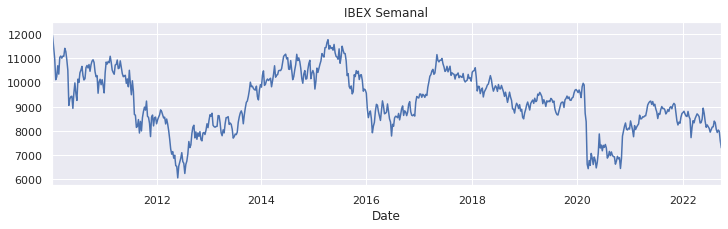

In [9]:
# Plot the data
y.plot(title="IBEX Semanal", figsize=(12, 3));

## Graficamos los datos de Rentabilidad Semanales

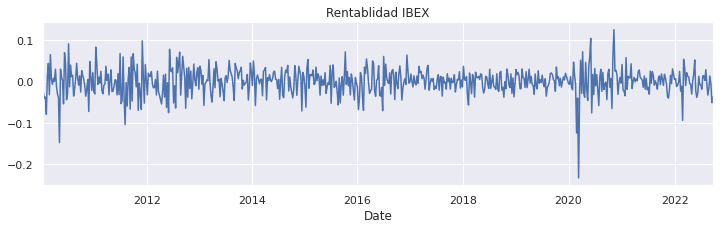

In [10]:
#
y_week.plot(title="Rentablidad IBEX", figsize=(12, 3));

# Especifiación y Estimación del modelo HMM
## Medias
## Varianzas

In [11]:
#
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_ibex = sm.tsa.MarkovRegression(y_week, k_regimes=2,trend='c',switching_variance=True)
res_ibex = mod_ibex.fit()

## Resultado del Modelo

In [12]:
res_ibex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  664
Model:               MarkovRegression   Log Likelihood                1405.373
Date:                Mon, 31 Oct 2022   AIC                          -2798.745
Time:                        07:54:29   BIC                          -2771.755
Sample:                    01-15-2010   HQIC                         -2788.287
                         - 09-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.511      0.609      -0.002       0.003
sigma2         0.0005   4.81e-05     10.297      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.004     -1.149      0.250      -0.012       0.003
sigma2         0.0024      0.000      6.405      0.000       0.002       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9719      0.011     86.440      0.000       0.950       0.994
p[1->0]        0.0742      0.031      2.402      0.016       0.014       0.135
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Probabilidades del Estado 0 (rentabilidad positiva)

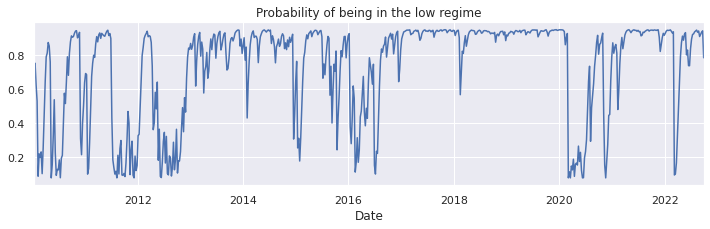

In [13]:
res_ibex.predicted_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades Suavizadas del Estado 0 (rentabilidad positiva)

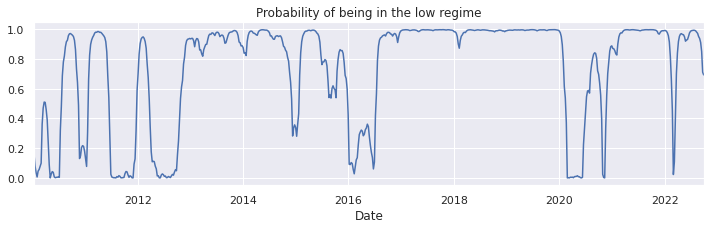

In [14]:
res_ibex.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades del Estado 1 (rentabilidad negativa)

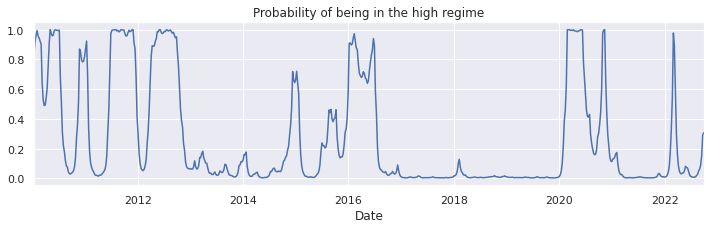

In [15]:
res_ibex.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

## Matriz de Transicciones

In [16]:
print(res_ibex.regime_transition)

[[[0.9719441 ]
  [0.07424557]]

 [[0.0280559 ]
  [0.92575443]]]


## Resumen del Modelo

In [17]:
sns.set(rc={'figure.figsize':(12, 12)})

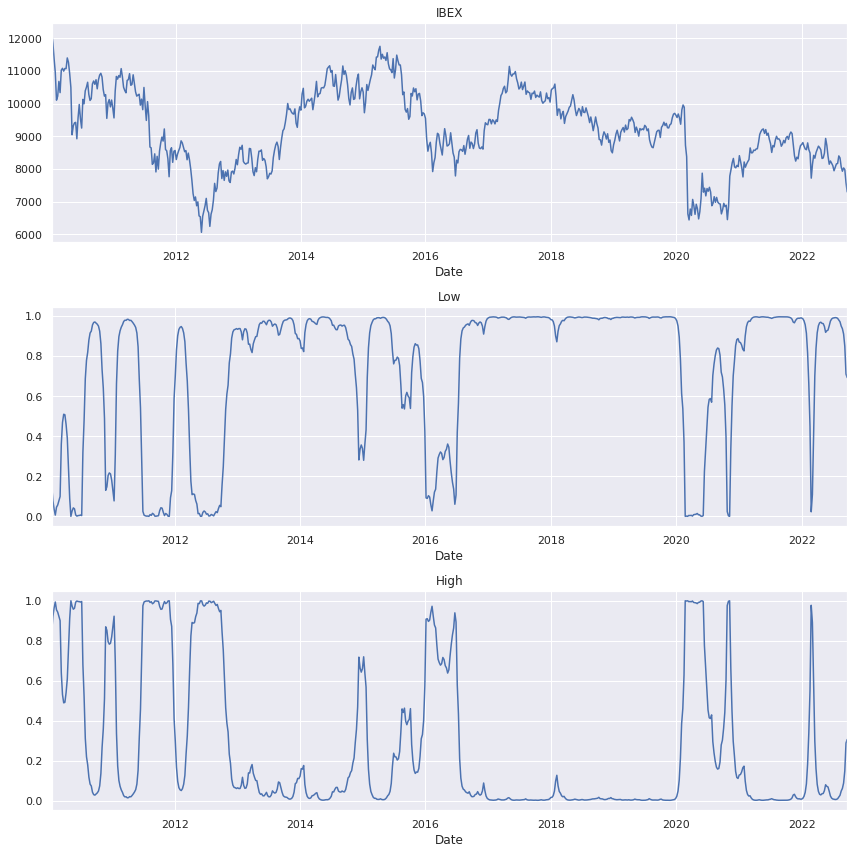

In [18]:
#
fig, axes = plt.subplots(nrows=3, ncols=1)
y.plot(ax=axes[0],title="IBEX")
res_ibex.smoothed_marginal_probabilities[0].plot(ax=axes[1],title="Low")
res_ibex.smoothed_marginal_probabilities[1].plot(ax=axes[2],title="High")
fig.tight_layout(pad=1.0)

In [19]:
res_ibex.predicted_marginal_probabilities

,0,1
Date,,
2010-01-15,0.725753,0.274247
2010-01-22,0.752258,0.247742
2010-01-29,0.624749,0.375251
2010-02-05,0.528532,0.471468
2010-02-12,0.084112,0.915888
...,...,...
2022-09-02,0.910103,0.089897
2022-09-09,0.922584,0.077416
2022-09-16,0.936208,0.063792


# Modelo HMM para KO
## Lectura de Datos

In [20]:
#
RISKY_ASSET = 'KO'
START_DATE = '2010-01-01'
END_DATE = '2022-09-30'

##  Usamos Datos de Yahoo

In [21]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 3208 rows of data.


## Calculamos los datos semanales

In [22]:
# Rentabilidad 
y = asset_df['Adj Close'].resample('W-FRI') \
                            .last()

## Calculamos la rentabilidad Logarítmica

In [23]:
#
y_week= (np.log(y) - np.log(y.shift(1))).dropna()
y_week.tail()

Date
2022-09-02   -0.031549
2022-09-09    0.018953
2022-09-16   -0.038370
2022-09-23   -0.015914
2022-09-30   -0.035256
Freq: W-FRI, Name: Adj Close, dtype: float64

## Graficamos los datos de Precios Semanales

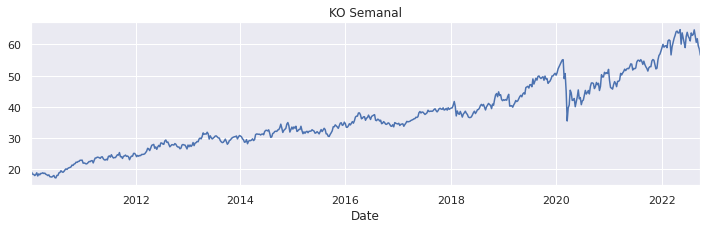

In [24]:
# Plot the data
y.plot(title="KO Semanal", figsize=(12, 3));

## Graficamos los datos de Rentabilidad Semanales

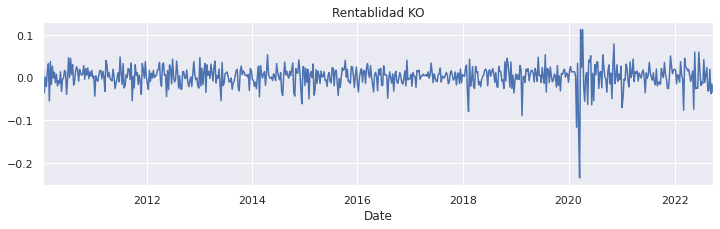

In [25]:
#
y_week.plot(title="Rentablidad KO", figsize=(12, 3));

# Especifiación y Estimación del modelo HMM
## Medias
## Varianzas

In [26]:
#
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_KO = sm.tsa.MarkovRegression(y_week, k_regimes=2,trend='c',switching_variance=True)
res_KO = mod_KO.fit()

## Resultado del Modelo

In [27]:
res_KO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  664
Model:               MarkovRegression   Log Likelihood                1582.696
Date:                Mon, 31 Oct 2022   AIC                          -3153.392
Time:                        07:54:33   BIC                          -3126.402
Sample:                    01-15-2010   HQIC                         -3142.934
                         - 09-30-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.001      3.483      0.000       0.001       0.004
sigma2         0.0004    2.6e-05     14.454      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0138      0.010     -1.370      0.171      -0.034       0.006
sigma2         0.0040      0.001      3.866      0.000       0.002       0.006
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9811      0.009    114.621      0.000       0.964       0.998
p[1->0]        0.2561      0.091      2.814      0.005       0.078       0.435
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Probabilidades del Estado 0 (rentabilidad positiva)

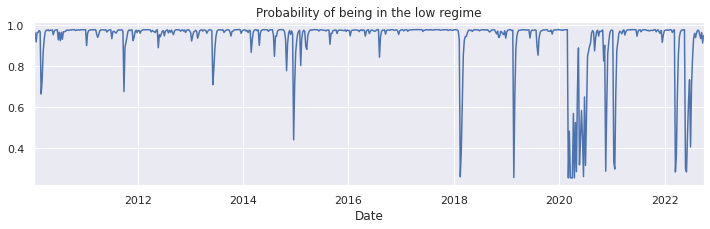

In [28]:
res_KO.predicted_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades Suavizadas del Estado 0 (rentabilidad positiva)

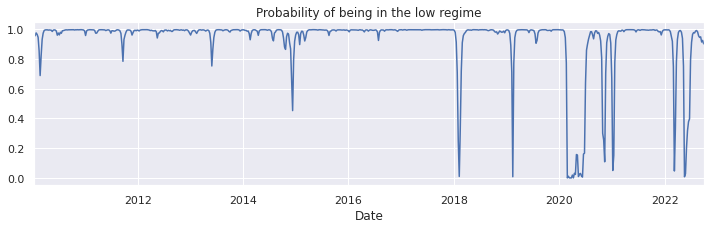

In [29]:
res_KO.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades del Estado 1 (rentabilidad negativa)

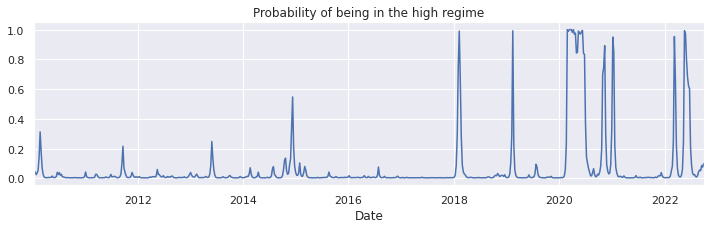

In [30]:
res_KO.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

In [31]:
print(res_KO.regime_transition)

[[[0.98106085]
  [0.25614069]]

 [[0.01893915]
  [0.74385931]]]


In [32]:
sns.set(rc={'figure.figsize':(12, 12)})

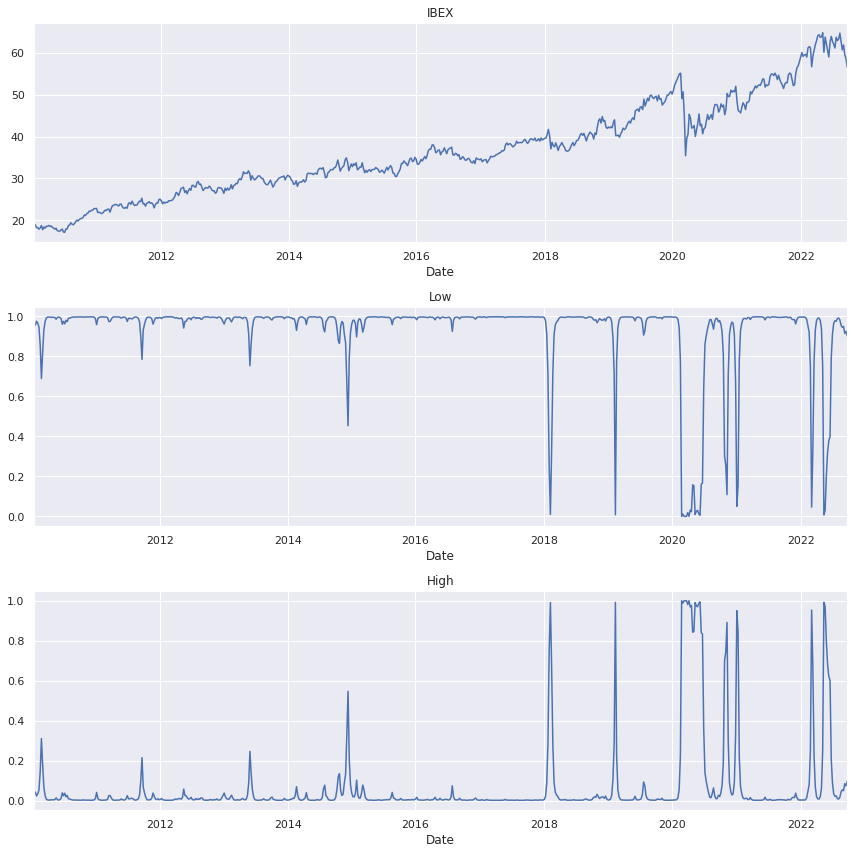

In [33]:
#
fig, axes = plt.subplots(nrows=3, ncols=1)
y.plot(ax=axes[0],title="IBEX")
res_KO.smoothed_marginal_probabilities[0].plot(ax=axes[1],title="Low")
res_KO.smoothed_marginal_probabilities[1].plot(ax=axes[2],title="High")
fig.tight_layout(pad=1.0)

In [34]:
res_KO.predicted_marginal_probabilities

,0,1
Date,,
2010-01-15,0.931150,0.068850
2010-01-22,0.960304,0.039696
2010-01-29,0.916279,0.083721
2010-02-05,0.961708,0.038292
2010-02-12,0.962243,0.037757
...,...,...
2022-09-02,0.951565,0.048435
2022-09-09,0.932483,0.067517
2022-09-16,0.961787,0.038213


# Ventas de KO

In [35]:
# Read Data
ko_df = pd.read_csv('/content/mnt/My Drive/Colab Notebooks/Series Temporales/S07/ko.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()

,Ingresos
Fecha,
2021-06-03,10129
2021-03-03,9020
2020-12-31,8611
2020-09-26,8652
2020-06-27,7150


## Tasa de Variacion Anual de las Ventas de KO

In [36]:
#
ko_ts_q=ko_df['Ingresos'].astype('float64').to_period('Q').sort_index()
ko_logret= (np.log(ko_ts_q) - np.log(ko_ts_q.shift(4))).dropna()
ko_logret.tail()

Fecha
2020Q2   -0.335173
2020Q3   -0.094238
2020Q4   -0.051711
2021Q1    0.047566
2021Q2    0.348290
Freq: Q-DEC, Name: Ingresos, dtype: float64

## Especificación y Estimación del Modelo

In [37]:
# (a switching mean is the default of the MarkovRegession model)
mod_ko = sm.tsa.MarkovRegression(ko_logret, k_regimes=3,trend='c',switching_variance=True)
res_ko = mod_ko.fit()

In [38]:
res_ko.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               Ingresos   No. Observations:                  118
Model:               MarkovRegression   Log Likelihood                 126.575
Date:                Mon, 31 Oct 2022   AIC                           -229.150
Time:                        07:54:37   BIC                           -195.902
Sample:                    03-31-1992   HQIC                          -215.650
                         - 06-30-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0338      0.006     -5.377      0.000      -0.046      -0.021
sigma2         0.0007      0.000      2.758      0.006       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0695      0.008      8.422      0.000       0.053       0.086
sigma2         0.0017      0.001      2.844      0.004       0.001       0.003
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0528      0.035      1.492      0.136      -0.017       0.122
sigma2         0.0358      0.010      3.474      0.001       0.016       0.056
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7960      0.081      9.815      0.000       0.637       0.955
p[1->0]        0.0721      0.046      1.580      0.114      -0.017       0.162
p[2->0]        0.0520      0.056      0.931      0.352      -0.057       0.162
p[0->1]        0.1517      0.074      2.045      0.041       0.006       0.297
p[1->1]        0.8337      0.064     12.941      0.000       0.707       0.960
p[2->1]        0.1468      0.078      1.884      0.060      -0.006       0.300
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Resultados

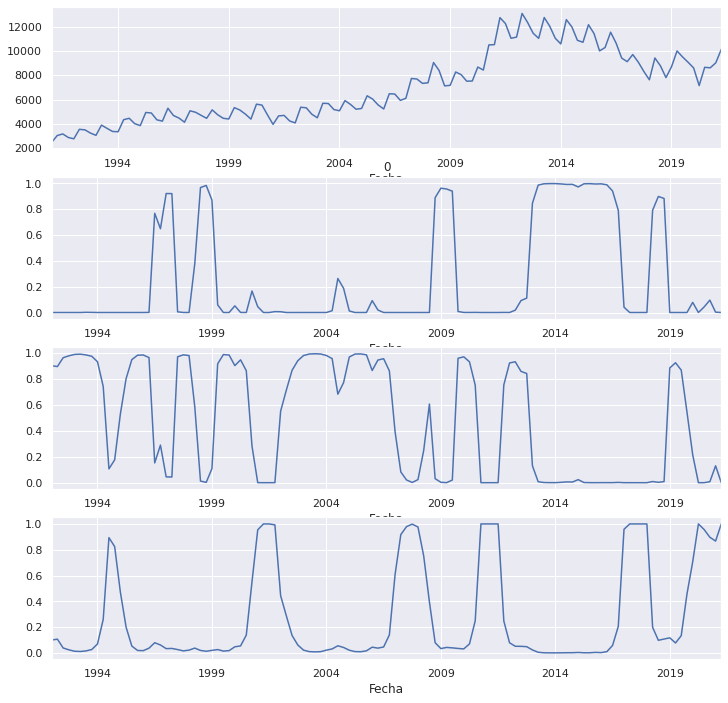

In [39]:
sns.set(rc={'figure.figsize':(12, 12)})
fig, axes = plt.subplots(nrows=4, ncols=1)
ko_ts_q.plot(ax=axes[0])
res_ko.smoothed_marginal_probabilities[0].plot(ax=axes[1],title="0")
res_ko.smoothed_marginal_probabilities[1].plot(ax=axes[2])
res_ko.smoothed_marginal_probabilities[2].plot(ax=axes[3])